In [118]:
import os
from pathlib import Path
import sys
sys.path.extend(['/home/andrea/Documents/Repositories/cancer_phenotype', '/home/andrea/Documents/Repositories/cancer_phenotype/base'])
import re
import copy
import numpy as np
import imageio
import cv2
from scipy.ndimage import morphology
from scipy.stats import mode
import skimage.morphology
from skimage import measure
from matplotlib import pyplot as plt
from quant import read_annotations, contour_to_mask, get_image_for_contour, annotations_summary, find_overlap, contours_to_multilabel_masks, ContourProcessor
from quant.features import region_properties
from base.datasets.wsi_reader import WSIReader

In [119]:
slide_id = '17_A047-4463_153D+-+2017-05-11+09.40.22'
annotations_dir = Path('/home/andrea/Documents/Repositories/AIDA/dist')
contour_struct = read_annotations(annotations_dir, (slide_id,))
annotations_summary(contour_struct)

17_A047-4463_153D+-+2017-05-11+09.40.22: lumen 868 contours | epithelium 2641 contours |



In [120]:
contour_lib = contour_struct['17_A047-4463_153D+-+2017-05-11+09.40.22']
example = contour_lib['epithelium'][140]
print(example.shape)
print(cv2.boundingRect(example))

(261, 1, 2)
(36020, 36958, 1333, 749)


<class 'numpy.ndarray'>
[  0. 250.]


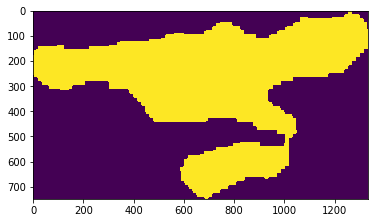

In [121]:
mask = contour_to_mask(example)
print(type(mask))
plt.imshow(mask * 255)
print(np.unique(mask))

In [122]:
opt = WSIReader.get_reader_options()
slide_path = Path('/home/andrea/Documents/Temp/Data/17_A047-4463_153D+-+2017-05-11+09.40.22.ndpi')
reader = WSIReader(opt, slide_path)

In [123]:
cv2.boundingRect(example)

(36020, 36958, 1333, 749)

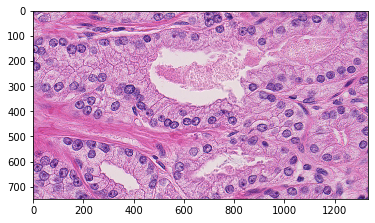

In [124]:
image = get_image_for_contour(example, reader)
plt.imshow(image)
# FIXME why is this suddenly broken ?

In [125]:
overlap_struct, contours, contour_bbs, labels = find_overlap(contour_lib)
label_values = {'epithelium': 200, 'lumen': 250}
indices = list(j for j, overlap_vect in enumerate(overlap_struct) if any(overlap_vect) and labels[j] == 'epithelium')
masks_gen = contours_to_multilabel_masks(contour_lib, overlap_struct, contour_bbs, label_values, indices=indices)

(411, 557)
[  0. 200. 250.]
(411, 557) (411, 557, 3)


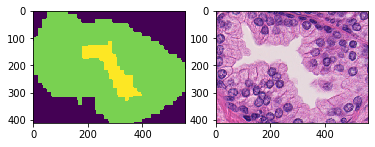

In [154]:
example_multilabel_mask, index = next(masks_gen)  # index was given above, so contour should be the desired one.
print(example_multilabel_mask.shape)
example_image = get_image_for_contour(contours[index], reader)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(example_multilabel_mask)
axes[1].imshow(example_image)
print(np.unique(example_multilabel_mask))
print(example_multilabel_mask.shape, example_image.shape) 

In [11]:
# test region props on multilabel mask
print(type(region_properties))

<class 'quant.features.Feature'>
